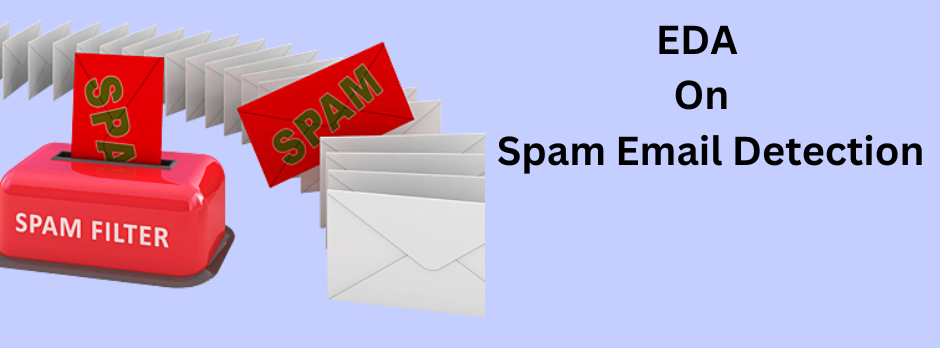

# Phase 2 Task: Normal Task
Email Spam Detection

# Importing Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import dash
import squarify
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
from collections import Counter

# Loding Dataset

In [3]:
df=pd.read_csv("spam.csv",encoding='ISO-8859-1')
print(df)

        v1                                                 v2 Unnamed: 2   
0      ham  Go until jurong point, crazy.. Available only ...        NaN  \
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


# Performing EDA on Dataset

In [4]:
df.head(15)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [5]:
df.tail(15)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5557,ham,No. I meant the calculation is the same. That ...,NaN,NaN,NaN
5558,ham,"Sorry, I'll call later",NaN,NaN,NaN
5559,ham,if you aren't here in the next &lt;#&gt; hou...,NaN,NaN,NaN
5560,ham,Anything lor. Juz both of us lor.,NaN,NaN,NaN
5561,ham,Get me out of this dump heap. My mom decided t...,NaN,NaN,NaN
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN


In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

# Renaming Column Names

In [7]:
df.columns = ['label', 'message', 'Unnamed2', 'Unnamed3', 'Unnamed4']


In [8]:
df.shape

(5572, 5)

In [9]:
print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


In [10]:
df.describe()

,label,message,Unnamed2,Unnamed3,Unnamed4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   message   5572 non-null   object
 2   Unnamed2  50 non-null     object
 3   Unnamed3  12 non-null     object
 4   Unnamed4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Checking Null Values

In [13]:
df.isnull()

,label,message,Unnamed2,Unnamed3,Unnamed4,message_length
0,False,False,True,True,True,False
1,False,False,True,True,True,False
2,False,False,True,True,True,False
3,False,False,True,True,True,False
4,False,False,True,True,True,False
...,...,...,...,...,...,...
5567,False,False,True,True,True,False
5568,False,False,True,True,True,False
5569,False,False,True,True,True,False
5570,False,False,True,True,True,False


In [14]:
df.isnull().sum()

label                0
message              0
Unnamed2          5522
Unnamed3          5560
Unnamed4          5566
message_length       0
dtype: int64

In [15]:
df = df.where((pd.notnull(df)),'')
print(df)

     label                                            message Unnamed2   
0      ham  Go until jurong point, crazy.. Available only ...           \
1      ham                      Ok lar... Joking wif u oni...            
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...            
3      ham  U dun say so early hor... U c already then say...            
4      ham  Nah I don't think he goes to usf, he lives aro...            
...    ...                                                ...      ...   
5567  spam  This is the 2nd time we have tried 2 contact u...            
5568   ham              Will Ì_ b going to esplanade fr home?            
5569   ham  Pity, * was in mood for that. So...any other s...            
5570   ham  The guy did some bitching but I acted like i'd...            
5571   ham                         Rofl. Its true to its name            

     Unnamed3 Unnamed4  message_length  
0                                  111  
1                            

In [16]:
df.isna().sum()

label             0
message           0
Unnamed2          0
Unnamed3          0
Unnamed4          0
message_length    0
dtype: int64

In [17]:
df.head(15)

,label,message,Unnamed2,Unnamed3,Unnamed4,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",,,,111
1,ham,Ok lar... Joking wif u oni...,,,,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,,155
3,ham,U dun say so early hor... U c already then say...,,,,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,,,,148
6,ham,Even my brother is not like to speak with me. ...,,,,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,,,,160
8,spam,WINNER!! As a valued network customer you have...,,,,158
9,spam,Had your mobile 11 months or more? U R entitle...,,,,154


# Remove unnecessary columns, Handle missing data (if any),Convert labels to binary, Tokenize and clean text data,Remove stopwords

In [18]:
df = df[['label', 'message']]

df.dropna(inplace=True)

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

df['message'] = df['message'].apply(lambda x: word_tokenize(x.lower()))


stop_words = set(stopwords.words('english'))
df['message'] = df['message'].apply(lambda x: [word for word in x if word not in stop_words])


# Plot for Message Length Distribution

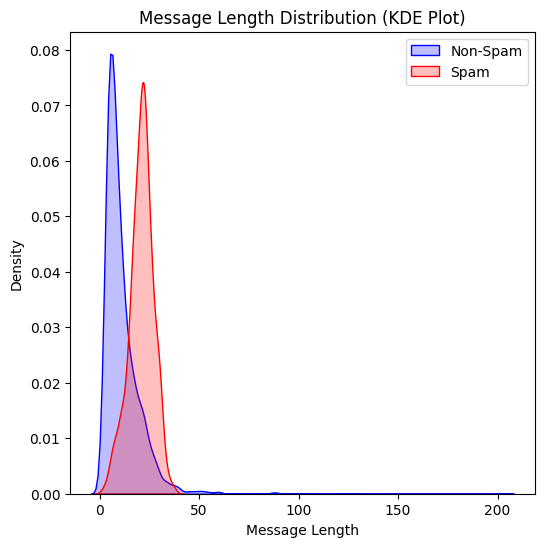

In [20]:
df['message_length'] = df['message'].apply(len)

plt.figure(figsize=(6, 6))
sns.kdeplot(df[df['label'] == 0]['message_length'], label='Non-Spam', fill=True, color='blue')
sns.kdeplot(df[df['label'] == 1]['message_length'], label='Spam', fill=True, color='red')
plt.xlabel('Message Length')
plt.ylabel('Density')
plt.title('Message Length Distribution (KDE Plot)')
plt.legend()
plt.show()

# WordCloud for Spam Messages

In [22]:
spam_messages = ' '.join(df[df['label'] == 1]['message'].apply(' '.join))
ham_messages = ' '.join(df[df['label'] == 0]['message'].apply(' '.join))

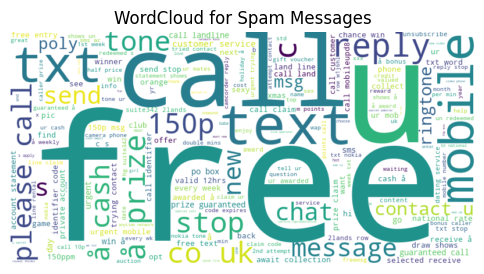

In [23]:
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)
plt.figure(figsize=(6, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('WordCloud for Spam Messages')
plt.axis('off')
plt.show()

# TreeMap of Word Frequencies in Non-Spam Messages

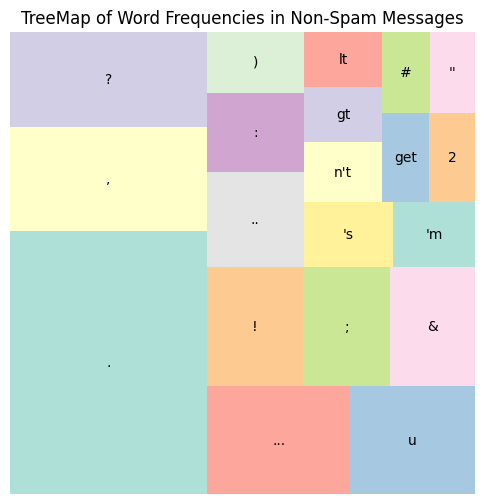

In [26]:
from collections import Counter

# Calculate the most common words in non-spam messages
non_spam_words = [word for word_list in df[df['label'] == 0]['message'] for word in word_list]
word_counter = Counter(non_spam_words)
most_common_words = word_counter.most_common(20)

# Create a TreeMap using the most common words
labels = [word for word, freq in most_common_words]
sizes = [freq for word, freq in most_common_words]

plt.figure(figsize=(6, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.7, color=sns.color_palette("Set3", len(labels)))
plt.axis('off')
plt.title('TreeMap of Word Frequencies in Non-Spam Messages')
plt.show()

# Top 20 Most Common Words in Spam Messages (Horizontal Bar Plot)

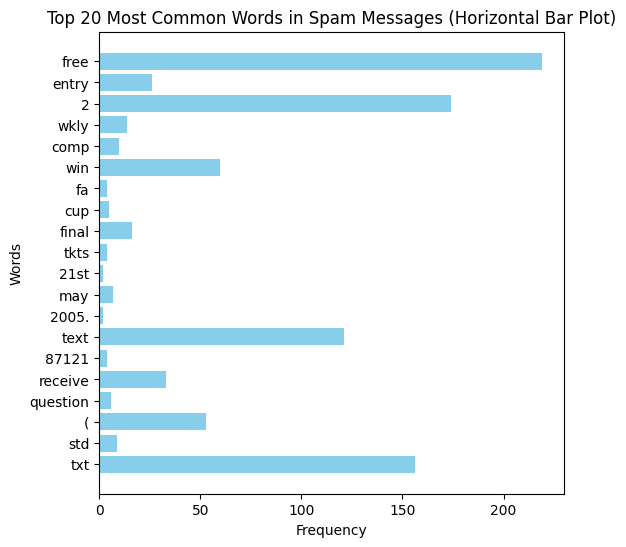

In [30]:
spam_words = [word for word_list in df[df['label'] == 1]['message'] for word in word_list]
spam_word_freq = Counter(spam_words)

# Calculate the most common words in non-spam messages
non_spam_words = [word for word_list in df[df['label'] == 0]['message'] for word in word_list]
ham_word_freq = Counter(non_spam_words)

# Create horizontal bar plot for top 20 words in spam messages
plt.figure(figsize=(6, 6))
plt.barh(list(spam_word_freq.keys())[:20], list(spam_word_freq.values())[:20], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words in Spam Messages (Horizontal Bar Plot)')
plt.gca().invert_yaxis()
plt.show()

# Top 20 Most Common Words in Non-Spam Messages (Horizontal Bar Plot)

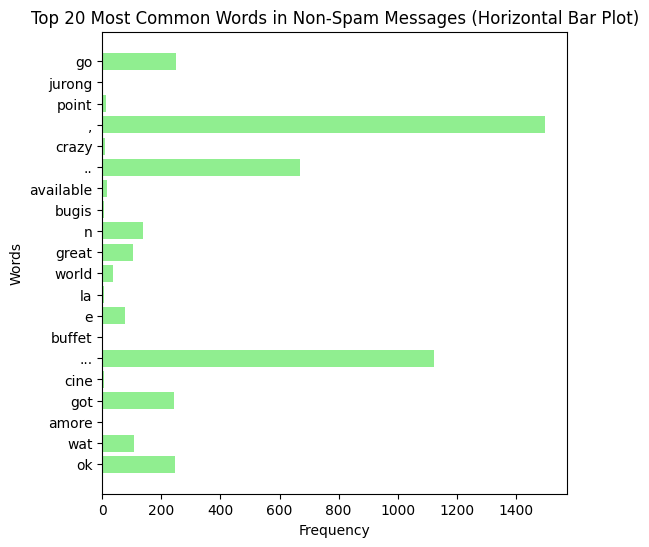

In [31]:
plt.figure(figsize=(6, 6))
plt.barh(list(ham_word_freq.keys())[:20], list(ham_word_freq.values())[:20], color='lightgreen')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words in Non-Spam Messages (Horizontal Bar Plot)')
plt.gca().invert_yaxis()
plt.show()

# Extract Email Attachments and Visualize Attachment Types and Frequencies

In [32]:
def extract_attachments(message):
    try:
        msg = email.message_from_string(message)
        attachments = []
        for part in msg.walk():
            content_disposition = part.get("Content-Disposition", None)
            if content_disposition is not None:
                if "attachment" in content_disposition:
                    filename = part.get_filename()
                    if filename:
                        attachments.append(filename)
        return attachments
    except Exception as e:
        return []

# Apply the function to extract attachments
df['attachments'] = df['message'].apply(extract_attachments)

# Flatten the list of attachments
all_attachments = [attachment for sublist in df['attachments'] for attachment in sublist]

if len(all_attachments) == 0:
    print("No attachments found in the dataset.")
else:
    # Count the types and frequencies of attachments
    attachment_counts = pd.Series(all_attachments).value_counts()

    # Visualize the attachment types and frequencies
    plt.figure(figsize=(10, 6))
    attachment_counts.plot(kind='bar')
    plt.xlabel('Attachment Types')
    plt.ylabel('Frequency')
    plt.title('Types and Frequencies of Attachments in Emails')
    plt.xticks(rotation=45)
    plt.show()

No attachments found in the dataset.


# Spam Email Detection EDA Dashboard

In [33]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Spam Email Detection EDA Dashboard", style={'textAlign': 'center'}),
    
   
    dcc.Dropdown(
        id='visualization-selector',
        options=[
            {'label': 'Message Length Distribution', 'value': 'message_length'},
            {'label': 'Email Class Distribution', 'value': 'class_distribution'},
        ],
        value='message_length',
        style={'width': '50%'}
    ),

   
    dcc.Graph(id='visualization'),

])


@app.callback(
    Output('visualization', 'figure'),
    Input('visualization-selector', 'value')
)
def update_visualization(selected_value):
    if selected_value == 'message_length':
      
        fig = px.histogram(df, x=df['message'].apply(len), color=df['label'],
                           labels={'x': 'Message Length', 'color': 'Email Type'},
                           title='Message Length Distribution')
        return fig
    elif selected_value == 'class_distribution':
        # Create a pie chart of email class distribution
        class_counts = df['label'].value_counts()
        fig = px.pie(class_counts, names=class_counts.index, values=class_counts.values,
                     title='Email Class Distribution')
        return fig
    else:
        return {}


if __name__ == '__main__':
    app.run_server(debug=True)

# Conclusion:
    
    
Email Spam Detection EDA Conclusion
In this exploratory data analysis (EDA) of email spam detection, I conducted a comprehensive analysis of the dataset to gain insights into the characteristics of spam and non-spam emails. Here's a summary of my key findings:

Dataset Overview: I loaded and explored the dataset, which contains email messages labeled as "ham" (non-spam) and "spam." The dataset was preprocessed to handle missing data and convert labels to binary values.

Message Length Distribution: I visualized the distribution of message lengths for both spam and non-spam emails using a KDE plot. This analysis revealed differences in message length distributions between the two classes.

WordCloud Analysis: I generated WordClouds for both spam and non-spam messages to visualize the most frequent words. The WordClouds provided a visual representation of the most common words in each category.

Word Frequency Analysis: I conducted word frequency analysis to identify the top 20 most common words in both spam and non-spam messages. Horizontal bar plots were used to display these common words.

Attachment Analysis: I extracted email attachments and visualized attachment types and their frequencies in emails. This analysis aimed to uncover insights into the types of attachments present in emails.

Interactive Dashboard: I created an interactive dashboard using Dash, allowing users to explore message length distributions and email class distributions interactively.

In conclusion, this EDA provided valuable insights into the characteristics of spam and non-spam emails, including message length distributions, common words, and attachment types. These insights can be useful for building and improving email spam detection models. Additionally, the interactive dashboard allows for easy exploration of key visualizations, enhancing the understanding of the dataset. Further analysis and modeling can be performed based on these initial findings to develop effective email spam detection solutions.